### Galakser som embeddinger

In [1]:
# Hvis dhlab ikke er installert, avkommenter linjen under og kjør
#!pip install dhlab

In [29]:
import dhlab.nbtext as nb
import dhlab.graph_networkx_louvain as gnl
import pandas as pd
import pyvis as pv
from pyvis.network import Network

In [4]:
nb.concordance('bil')

",Beste praksis i ergoterapi,2007","» , « å kjøre",bil,"» , « å skrive"
",Beste praksis i ergoterapi,2007",Kjøre,bil,None
",Beste praksis i ergoterapi,2007",kunne være når hun kjørte,bil,", løftet og bar ,"
",Beste praksis i ergoterapi,2007","jobben , når hun kjørte",bil,og når hun støvsugde .
",Beste praksis i ergoterapi,2007",Kjøre,bil,None
"Hammer, Olav,Spreidde blad,1915",me sjåa oss ikring eit,bil,■ ■ og so med
"Hammer, Olav,Spreidde blad,1915",Det er eit,bil,som berget skalv og skok
"Hammer, Olav,Spreidde blad,1915",Her er ein kveldhimel soleglad,bil,""""
"Ottosen, Rune,Avisbildet av NATOs krigføring på Balkan,2002",en metafor for krigen og,bil,som metafor for en krigsmaskin
"Tanggaard, Jan,Biologi 8,1984",flyplass eller inne i en,bil,. Du kan også måle
"Colette,""Chéri"",1945",En skinnende liten,bil,suste nesten lydløs forbi porten


In [9]:
nb.book_corpus(title="sangen%om%røde%")

,urn,author,title,year
0,2015090129001,"Mykle, Agnar",Sangen om den røde rubin,1956
1,2008021104029,"Mykle, Agnar",Sangen om den røde rubin,1995
2,2009011504069,"Mykle, Agnar",Sangen om den røde rubin,2000
3,2009033100094,"Mykle, Agnar",Sangen om den røde rubin,2002
4,2016020808126,"Mykle, Agnar",Sangen om den røde rubin,2000
5,2014040406070,,Sangen om den røde rubin,2010
6,2008021404040,"Mykle, Agnar",Sangen om den røde rubin,1995
7,2007052404016,"Mykle, Agnar",Sangen om den røde rubin,1967
8,2008100104083,"Mykle, Agnar",Sangen om den røde rubin,1998
9,2007010501000,"Linnankoski, Johannes",Sangen om den ildrøde blomsten,1938


In [16]:
tot = nb.frame(nb.totals(150000), 'tot')

In [26]:
book_urn = 2008111304085

In [15]:
bf = nb.frame(nb.get_freq(book_urn, top = 0), 'freq')

In [24]:
check = nb.frame_sort(pd.DataFrame(bf.freq/tot.tot).dropna()).head(200)

In [58]:
book_network = nb.make_network(book_urn, list(check.index))

In [67]:
book_network.remove_edges_from([x for x in book_network.edges(data=True) if x[2]['weight'] < 3])

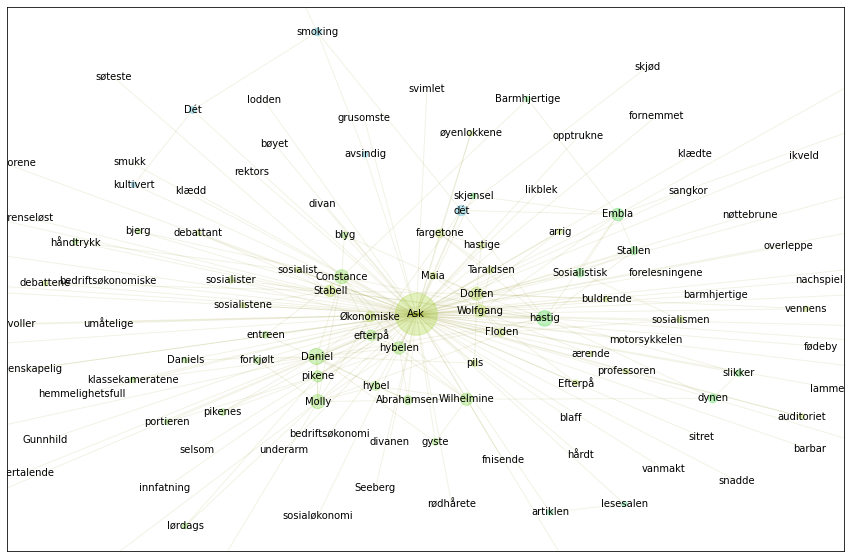

In [68]:
gnl.show_graph(book_network)

In [69]:
g = Network("800px", "800px", notebook = True)

In [70]:
g.from_nx(book_network)
g.force_atlas_2based()

In [72]:
#g.show_buttons(filter_=['physics'])
#g.show("nx.html")

In [65]:
gnl.show_communities(book_network)

 :  

Daniel-Constance :  Daniel, Constance, Molly, hybelen, Wilhelmine, pikene, efterpå, Abrahamsen, hybel, blyg, forkjølt, entreen, pikenes, gyste, klassekameratene, portieren, bjerg, Daniels, håndtrykk, lørdags, laknene, søteste, frykteligste, underliv, fregnete, fniser

hastig-Embla :  hastig, Embla, dynen, Sosialistisk, Stallen, slikker, Barmhjertige, skjensel, svelger, stønnende, treogtyve, swing

Ask-Doffen :  Ask, Doffen, Wolfgang, Stabell, Økonomiske, fargetone, Floden, pils, hastige, sosialister, sosialismen, Maia, Taraldsen, øyenlokkene, arrig, buldrende, ærende, professoren, sosialist, debattene, auditoriet, Efterpå, vennens, debattant, sosialistene, lodden, overleppe, Seeberg, klædd, barmhjertige, vanmakt, bøyet, heftigste, selsom, divanen, likblek, sjenanse, lammende, grenseløst, bortvendt, forelesningene, hårdt, nøttebrune, lommetørklæ, overtalende, motorsykkelen, rødhårete, innvoller, klædte, hemmelighetsfull, takrennen, fnisende, grusomste, blasse, skjendige, andakt, m

In [66]:
gnl.show_cliques(book_network)

(3, 1) blyg, Embla, Doffen, sosialismen, hastige, Floden, dynen, buldrende, Abrahamsen, Efterpå, Wolfgang, Ask, slikker, ærende, skjensel, vennens, Økonomiske, Constance, klassekameratene, portieren, Stabell, bjerg, hybelen, Maia, øyenlokkene, fargetone, sosialist, debattene, Wilhelmine, debattant, pils, Stallen, pikene, forkjølt, arrig, Sosialistisk, entreen, Molly, Taraldsen, sosialister, dét, hastig, efterpå, Daniels, håndtrykk, sosialistene, pikenes, lørdags, Daniel, gyste, hybel

(3, 2) Ask, auditoriet, professoren

(3, 3) Ask, Dét, kultivert

(3, 4) Ask, lesesalen, artiklen

(4, 1) Embla, Doffen, Wilhelmine, Abrahamsen, Stallen, forkjølt, Wolfgang, pikene, Sosialistisk, Ask, Molly, Økonomiske, Constance, dét, hastig, efterpå, Stabell, pikenes, hybelen, Daniel, Maia, hybel

(4, 2) Ask, dynen, slikker, hastig

(5, 1) Økonomiske, Constance, hastig, efterpå, Wilhelmine, hybelen, pikene, Daniel, Ask, Molly

(5, 2) hastig, Wolfgang, Doffen, Stabell, Ask

(6, 1) hybelen, Daniel, Constan

## Test ut med kommando `relaterte_ord`

Det er en egenvektorbasert måte å hente ut tilsvarende ord fra grafen gitt under.

In [7]:
G= nb.make_graph('health' , lang='eng', leaves = 1)

IndexError: list index out of range

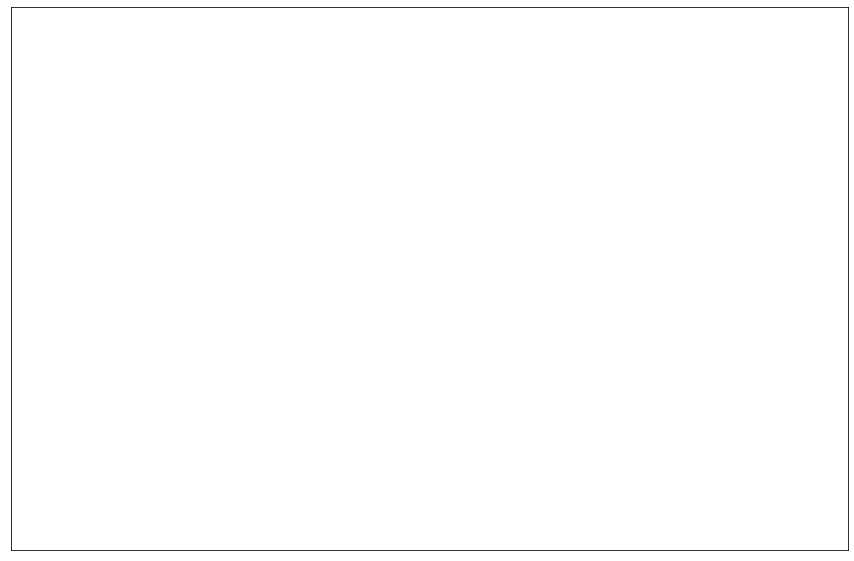

In [8]:
gnl.show_graph(G, spread = 1.5)

In [16]:
gnl.show_communities(G)

sanatoriums-spas :  sanatoriums, spas, indolency, hospitals, resorts, rest, clinics, asylums, holiday, enjoyment, hotels, Hospitals, homes

wellness-fitness :  wellness, fitness, healing, wholeness, prevention, Fitness, holistic, preventing, preventive, longevity, illness, preventative, Illness, spa, promotion

gyms-playgrounds :  gyms, playgrounds, pools, locker, bars, cafeterias, swimming, clubs, halls, centers, swings, auditoriums, mobiles, parks, centres, saunas

Hardiness-Shiftwork :  Hardiness, Shiftwork, Health, Night, Killing, social, Freezing, stress, Its, performance, Women

health-unhealth :  health, unhealth, weakliness, nonhealth, sociodemography, hapines, safety.8, paleodemography, depression, spirits.17, hygine, degeneracy, Gyms, safety.9, care

safety-efficacy :  safety, efficacy, tolerability, cacy, bioeffects, nonsafety, antipollution, wellfare, goodhap, wholesomeness, Bioeffects, Immunogenicity, wellfaire, Tolerability, Efficacy, liveness, soundness, immunogenicity



In [31]:
helse = nb.make_graph('helse', cutoff=12, leaves=0)

In [32]:
gnl.show_communities(helse)

miljø-kultur :  miljø, kultur, idrett, næring, oppvekst, samferdsel, klima, utvikling, energi, sikkerhet, religion, teknikk, fritid, historie, friluftsliv, natur

helse-kropp :  helse, kropp, liv, sosial, telekom, ånd, sjel, helsefag, seksualitet, it, dod, kulturell, hode, sex, politisk, hjerne, økonomisk, sinn, lære, ansikt, utseende, død

sosiale-helsemessige :  sosiale, helsemessige, politiske, humanitære, okonomiske, kulturelle, økonomiske

trivsel-velferd :  trivsel, velferd, livskvalitet, sunnhet, velvære, Helse, trygghet, glede, levekår, skjønnhet, trim, livsglede, sysselsetting, komfort, fremgang, hygge, velstand, verdiskaping, vekst, styrke, mestring, vitalitet, arbeidsevne

omsorg-godhet :  omsorg, godhet, kjærlighet, pleie-, pleie

kosthold-ernæring :  kosthold, ernæring, hygiene, fysisk, landbruk, livsstil, trening

mat-Mat :  mat, Mat, vin, kaffi, kaffe, drikke, klær, vann, tobakk, kopp, medisiner, husly

sosialsjef-sosialstyret :  sosialsjef, sosialstyret, helse-, sosialf